In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

(x_train, y_train), (x_test, y_test) =  keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train.shape, y_train.shape

2024-07-31 12:59:45.476767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-31 12:59:45.532282: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-31 12:59:45.546234: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-31 12:59:45.574202: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 12:59:47.130597: W tensorflow/compiler/tf2

((60000, 28, 28), (60000,))

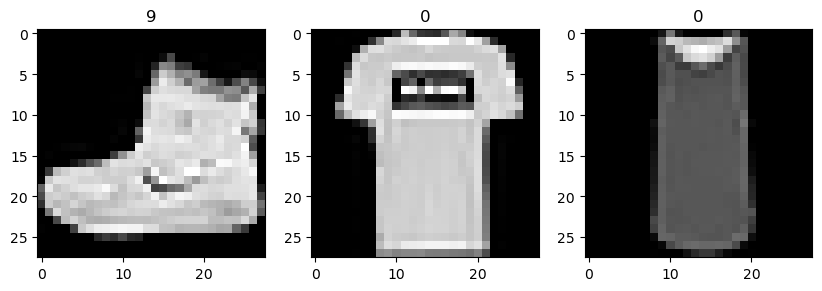

In [2]:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 3, figsize=(10, 10))
for i in range(3):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title(y_train[i])

In [3]:
# Add channel dimension for conv2d
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

number_of_classes = len(set(y_train))
print(f"Number of classes: {number_of_classes}")

Number of classes: 10


In [8]:
data_generator = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
data_generator.fit(x_train)

In [16]:
from keras._tf_keras.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, MaxPooling2D
# from tensorflow.keras.layers import Input, Conv2D, , Flatten, Dense
i = Input(shape=x_train[0].shape) 
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(number_of_classes, activation='softmax')(x)

BATCH_SIZE = 64

In [15]:

from keras._tf_keras.keras.models import Model

model_1 = Model(inputs=i, outputs=x)
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_1.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=1, batch_size=BATCH_SIZE)

938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8914 - loss: 0.2910 - val_accuracy: 0.8946 - val_loss: 0.2920


In [19]:
model_2 = Model(inputs=i, outputs=x)
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model_2.fit(data_generator.flow(x_train, y_train), validation_data=(x_test, y_test), 
                      epochs=1, batch_size=BATCH_SIZE, 
                      steps_per_epoch=x_train.shape[0] // BATCH_SIZE * 2) 

1874/1874 ━━━━━━━━━━━━━━━━━━━━ 65s 32ms/step - accuracy: 0.7949 - loss: 0.5353 - val_accuracy: 0.8194 - val_loss: 0.4630


In [5]:
model_1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 13, 13, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,552 (1.88 MB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,702 (1.25 MB)

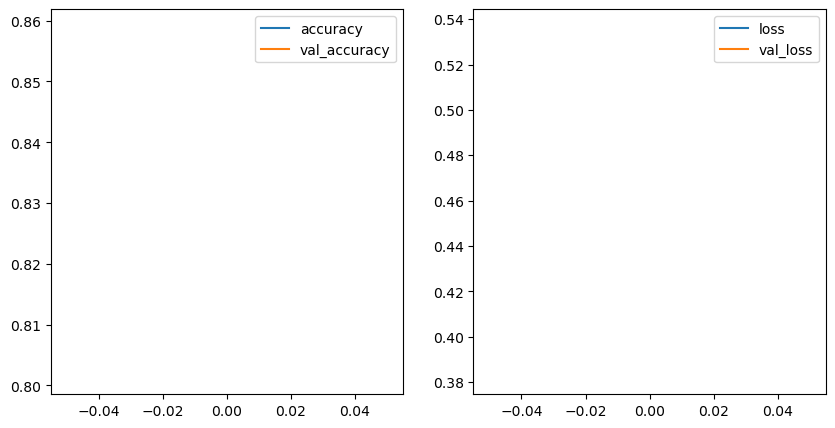

In [6]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))  
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].legend()

2024-07-31 13:00:22.008829: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Confusion matrix, without normalization
[[800   0  15  48   8   1 121   0   7   0]
 [  2 957   1  30   7   0   2   0   1   0]
 [  8   0 738  14 181   0  57   0   2   0]
 [ 22   1   4 920  30   0  23   0   0   0]
 [  0   1  67  59 829   0  43   0   1   0]
 [  0   0   0   0   0 933   0  47   0  20]
 [135   5 104  43 133   0 565   0  15   0]
 [  0   0   0   0   0  12   0 914   0  74]
 [  2   2   7   3  10   4   8   6 956   2]
 [  0   0   0   0   0   2   0  19   1 978]]


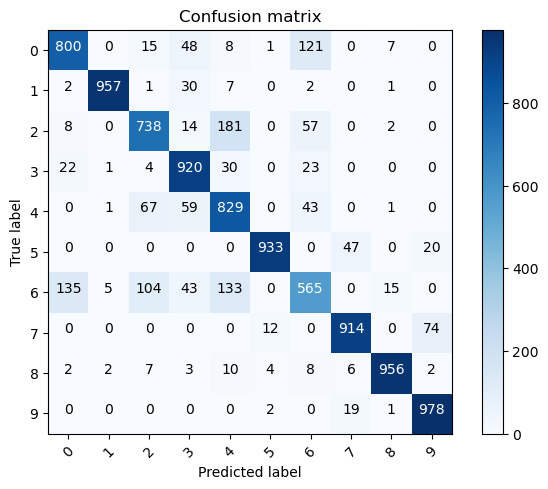

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(number_of_classes)))
